# **CURSO 2 - CD, AM E DM**
## **PROFa. Roseli A F Romero**

#** MBA EM IA E BIGDATA**

# Exercício 01 - **Exploração e visualização de dados**

# **Objetivo**: Trabalhar com Dados unidimensionais e multidimensionais


In [ ]:
# Permissão de leitura para o Drive
# Autorize o Collab a acessar seus arquivos no drive
from google.colab import drive
drive.mount('/content/drive')

Suponha que duas cidades diferentes tenham te fornecido as temperaturas máximas (celsius) durante diferente dias do ano.
Os dados foram disponibilizados nos arquivos "cidade_1.txt" e "cidade_2.txt".

As leituras estão em ordem cronológica, porém, o sensor da cidade 1 falhou em alguns dias. Nesses casos, a leitura foi substituida pelo o caracter "?".


### **Questão 0**

Substitua os valores faltantes pela média das leituras do dia anterior e do dia seguinte.

---

Lendo dados das cidades 1 e 2. Especificamos que os valores ausentes são representados pelo caractere '?'. Use o comando info() para verificar se os dados foram carregados corretamente.

In [ ]:
import numpy as np
import pandas as pd

cidade1 = pd.read_csv("cidade_1.txt", names=["Temperatura"], na_values=['?'])
cidade1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperatura  363 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [ ]:
cidade2 = pd.read_csv("cidade_2.txt", names=["Temperatura"], na_values=['?'])
cidade2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperatura  365 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


Notamos que apenas a cidade 1 possui valores faltantes, como esperado. Vamos verificar quais os índices que possuem valores faltantes:

In [ ]:
nans = cidade1.loc[np.any(cidade1.isna(),axis=1)]
nans

,Temperatura
37,NaN
93,NaN


Substituindo valores dos elementos 37 e 93 pela média do dia anterior e posterior

In [ ]:
for index, row in nans.iterrows():
    media = np.mean([cidade1.loc[index-1, 'Temperatura'],cidade1.loc[index+1, 'Temperatura']])
    cidade1.loc[index, 'Temperatura'] = media
cidade1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperatura  365 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [ ]:
cidade1.loc[ 34:39]

,Temperatura
34,25.168410
35,25.723845
36,27.120825
37,26.224216
38,25.327608
39,33.756012


In [ ]:
cidade1.loc[90:95]

,Temperatura
90,24.172101
91,23.187842
92,33.759425
93,28.128649
94,22.497873
95,27.037697


### **Questão 1**. 
Calcule a média e a variância de temperatura no ano para cada cidade.

---

- Utilizando numpy:

In [ ]:
cidade1_temp_values = cidade1['Temperatura'].values
cidade2_temp_values = cidade2['Temperatura'].values
print('Media cidade 1 igual a: %.2f '% (np.mean(cidade1_temp_values)))
print('Media cidade 2 igual a: %.2f '% (np.mean(cidade2_temp_values)))

print('Variancia  da cidade 1 igual a: %.2f '% (np.var(cidade1_temp_values, ddof=1)))
print('Variancia da cidade 2 igual a: %.2f '% (np.var(cidade2_temp_values, ddof=1)))
# ddof=1 faz com que numpy use estimação não enviesada do desvio padrão. Isso é padrão no pandas
# Mais info em https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation


Media cidade 1 igual a: 24.01 
Media cidade 2 igual a: 27.82 
Variancia  da cidade 1 igual a: 58.20 
Variancia da cidade 2 igual a: 47.79 


- Utilizando `describe()` do pandas:

In [ ]:
cidade1.describe()

,Temperatura
count,365.000000
mean,24.012639
std,7.628782
min,-4.369505
25%,21.968610
50%,25.228544
75%,28.606161
max,41.126495


In [ ]:
cidade1.var()

Temperatura    58.198319
dtype: float64

In [ ]:
cidade2.describe()

,Temperatura
count,365.000000
mean,27.820796
std,6.913258
min,20.006046
25%,22.284383
50%,24.060519
75%,35.988879
max,37.994584


In [ ]:
cidade2.var()

Temperatura    47.793135
dtype: float64

### **Questão 2**.

Construa o histograma para os dados da cidade 1 e para a cidade 2 (importar a biblioteca **seaborn**)

---

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


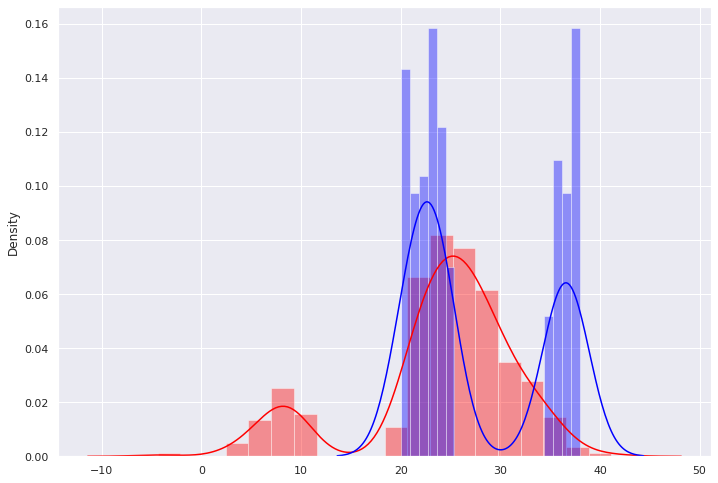

In [ ]:
import seaborn as sns

# Usamos essa opção para melhor visualizar os gráficos
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.distplot(cidade1, bins=20, color="red")
sns.distplot(cidade2, bins=20, color="blue")

### **Questão 3**.

Construa o boxplot para os dados da cidade 1 e para a cidade 2.

---

In [ ]:
df_cidades = pd.concat([cidade1.assign(Cidade=1), cidade2.assign(Cidade=2)])
df_cidades = df_cidades.reset_index(drop=True)
df_cidades

,Temperatura,Cidade
0,9.404436,1
1,24.284961,1
2,28.210288,1
3,4.463036,1
4,25.764866,1
...,...,...
725,21.498136,2
726,37.876996,2
727,24.468403,2
728,21.403285,2


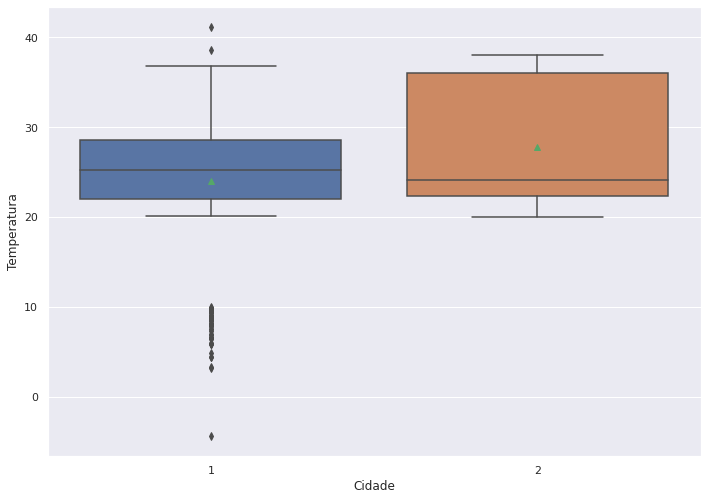

In [ ]:
sns.boxplot(x='Cidade', y='Temperatura', data=df_cidades, showmeans=True)

Apesar da média da cidade 2 ser maior, percebemos que são apenas alguns outliers que puxam seu valor para cima. Pelo bloxplot, percebemos também que a cidade 1 teve uma variância menor do que a cidade 2. 

### **Questão 4**. 
Calcule o número de dias quentes em cada cidade. Consideramos um dia como quente caso sua temperatura máxima tenha sido maior ou igual 25 graus celsius.
- Dica: Use a função `argwhere` da biblioteca **numpy** ou `query` do **pandas**.

---

- Usando numpy:

In [ ]:
#Dias quentes cidade 1
dias_quentes_1 = np.argwhere(cidade1.values>=25)
print("Numero de Dias quentes cidade 1:" , len(dias_quentes_1))

#Dias quentes cidade 2
dias_quentes_2 = np.argwhere(cidade2.values>=25)
print("Numero de Dias quentes cidade 2:" , len(dias_quentes_2))


Numero de Dias quentes cidade 1: 192
Numero de Dias quentes cidade 2: 137


- Usando pandas:

In [ ]:
dias_quentes_1 = cidade1.query('Temperatura >= 25').size
print("Numero de Dias quentes cidade 1:", dias_quentes_1)

dias_quentes_2 = cidade2.query('Temperatura >= 25').size
print("Numero de Dias quentes cidade 2:" , dias_quentes_2)

Numero de Dias quentes cidade 1: 192
Numero de Dias quentes cidade 2: 137


## **Dados multidimensionais** 

Considere o conjunto de dados dos jogadores de futebol fornecido, que possui vários atributos (08) sendo  3 atributos numericos: height, weight, age. Faça a leitura do arquivo: jogadores_exercicio1.csv.
 

---

In [ ]:
players = pd.read_csv("jogadores_exercicio1.csv")
players

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,1.9304,79.832257,33
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,1.7018,68.038855,29
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,1.8288,81.193034,35
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,1.8034,69.853225,42
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,1.7526,72.121187,35
...,...,...,...,...,...,...,...,...
345,10199,7627,Thierno Bah,45269,1982-10-05 00:00:00,1.7526,68.038855,38
346,1216,246330,Benjamin Morel,202753,1987-06-10 00:00:00,1.8034,69.853225,34
347,4262,33793,Hugo Alcantara,14491,1979-07-28 00:00:00,1.9050,84.821773,42
348,5886,173699,Koro Kone,207538,1989-07-05 00:00:00,1.7780,74.842741,32


In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  350 non-null    int64  
 1   player_api_id       350 non-null    int64  
 2   player_name         350 non-null    object 
 3   player_fifa_api_id  350 non-null    int64  
 4   birthday            350 non-null    object 
 5   height              350 non-null    float64
 6   weight              350 non-null    float64
 7   age                 350 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 22.0+ KB




### **Questão 5**. 

Calcule os quatro momentos (média, variância, obliquidade e achatamento) para os atributos `height`, `weight` e `age`.

 - Dica: Utilize os métodos `mean()`,  `var()`, `skew()` e `kurtosis()` do `pandas.DataFrame`.
 
 ---

In [ ]:
numeric_attribs1 = players[ ['height'] ]
numeric_attribs1

,height
0,1.9304
1,1.7018
2,1.8288
3,1.8034
4,1.7526
...,...
345,1.7526
346,1.8034
347,1.9050
348,1.7780


In [ ]:
print("Média:")
print(numeric_attribs1.mean().to_string())

Média:
height    1.820164


In [ ]:
print("Variância:")
print(numeric_attribs1.var().to_string())

Variância:
height    0.003669


In [ ]:
print("Obliquidade:")
print(numeric_attribs1.skew().to_string())

Obliquidade:
height   -0.12008


In [ ]:
print("Achatamento:")
print(numeric_attribs1.kurtosis().to_string())

Achatamento:
height   -0.432179


###**Questão 6**.

Gere o boxplot de atributo Height do conjunto, analise se os dados estão centrados (simetria) e estime os quartis deste atributo.

---

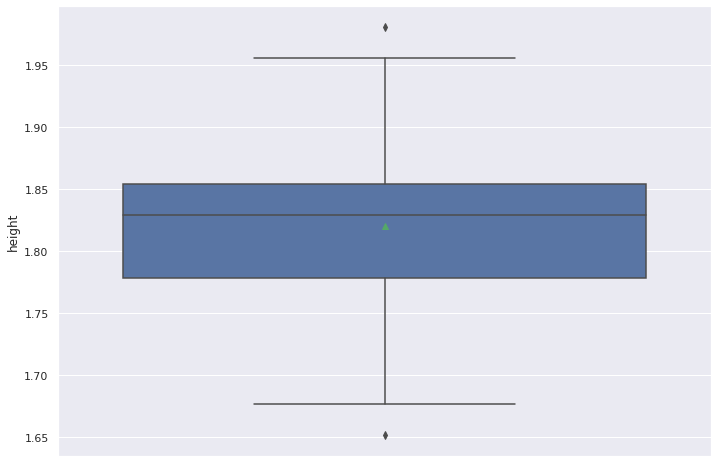

In [ ]:
sns.boxplot(y = 'height', data=players, showmeans=True)

In [ ]:
print(players['height'].describe())
print('Mediana: ', players['height'].median())
print('Media:  ', players['height'].mean())
print('Obliquidade: ', players['height'].skew())

count    350.000000
mean       1.820164
std        0.060569
min        1.651000
25%        1.778000
50%        1.828800
75%        1.854200
max        1.981200
Name: height, dtype: float64
Mediana:  1.8288
Media:   1.8201639999999997
Obliquidade:  -0.12007981638318897


Observamos uma sutil diferença entre a média e mediana, mostrando que os dados estão praticamente centralizados uma vez que sua obliquidade é desconsiderável.

Podemos confirmar calculando diretamente a obliquidade da distribuição, que teve resultado negativo porém perto de 0, indicando que a distribuição tem uma cauda à esquerda porém não muito significativa.


###**Questão 7**.
Calcule os quatro momentos (média, variância, obliquidade e achatamento) para o atributo **weight**.

In [ ]:
numeric_attribs2 = players[ ['weight'] ]
numeric_attribs2

,weight
0,79.832257
1,68.038855
2,81.193034
3,69.853225
4,72.121187
...,...
345,68.038855
346,69.853225
347,84.821773
348,74.842741


In [ ]:
print("Média:")
print(numeric_attribs2.mean().to_string())
print("Variância:")
print(numeric_attribs2.var().to_string())
print("Obliquidade:")
print(numeric_attribs2.skew().to_string())
print("Achatamento:")
print(numeric_attribs2.kurtosis().to_string())

Média:
weight    76.454938
Variância:
weight    41.281539
Obliquidade:
weight    0.030277
Achatamento:
weight   -0.108665


###**Questão 8**.
Gere o boxplot de atributo **weight** do conjunto, analise se os dados estão centrados (simetria) e estime os quartis deste atributo.

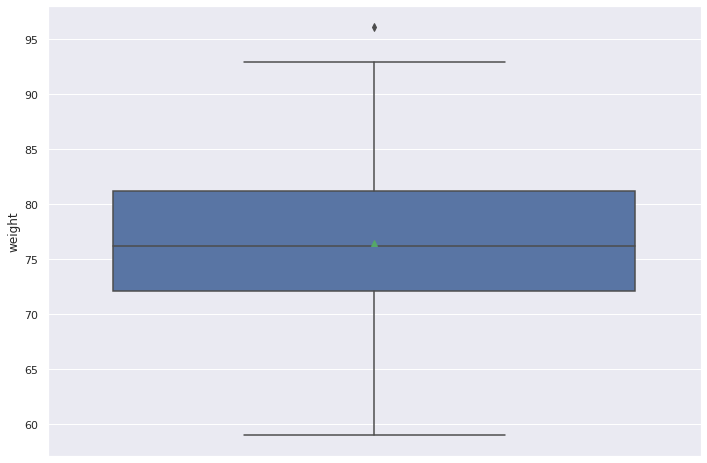

In [ ]:
sns.boxplot(y = 'weight', data=players, showmeans=True)

In [ ]:
print(players['weight'].describe())
print('Mediana: ', players['weight'].median())
print('Media:  ', players['weight'].mean())
print('Obliquidade: ', players['weight'].skew())

count    350.000000
mean      76.454938
std        6.425071
min       58.967008
25%       72.121187
50%       76.203518
75%       81.193034
max       96.161582
Name: weight, dtype: float64
Mediana:  76.20351816
Media:   76.4549379308
Obliquidade:  0.03027696608291131


Observamos que não existe diferença entre a média e mediana, mostrando que os dados estã centralizados uma vez que sua obliquidade é desconsiderável (muito próximo de zero).

Podemos confirmar calculando diretamente a obliquidade da distribuição, que teve resultado positivo porém perto de 0, indicando que a distribuição está centrada na média.

###**Questão 9**.
Calcule os quatro momentos (média, variância, obliquidade e achatamento) para o atributo **age**.

In [ ]:
numeric_attribs3 = players[ ['age'] ]
numeric_attribs3

,age
0,33
1,29
2,35
3,42
4,35
...,...
345,38
346,34
347,42
348,32


In [ ]:
print("Média:")
print(numeric_attribs3.mean().to_string())
print("Variância:")
print(numeric_attribs3.var().to_string())
print("Obliquidade:")
print(numeric_attribs3.skew().to_string())
print("Achatamento:")
print(numeric_attribs3.kurtosis().to_string())

Média:
age    34.305714
Variância:
age    26.46501
Obliquidade:
age    0.299891
Achatamento:
age   -0.334024


###**Questão 10**.
Gere o boxplot de atributo **Age** do conjunto, analise se os dados estão centrados (simetria) e estime os quartis deste atributo.

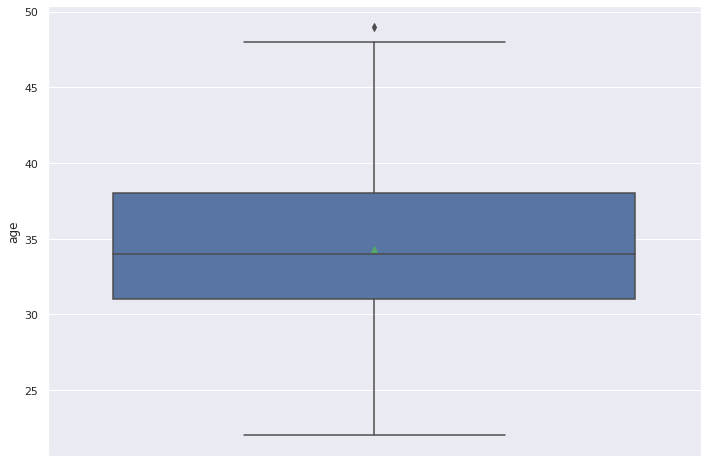

In [ ]:
sns.boxplot(y = 'age', data=players, showmeans=True)

In [ ]:
print(players['age'].describe())
print('Mediana: ', players['age'].median())
print('Media:  ', players['age'].mean())
print('Obliquidade: ', players['age'].skew())

count    350.000000
mean      34.305714
std        5.144415
min       22.000000
25%       31.000000
50%       34.000000
75%       38.000000
max       49.000000
Name: age, dtype: float64
Mediana:  34.0
Media:   34.30571428571429
Obliquidade:  0.2998913445412143


Observamos que não existe diferença entre a média e mediana, mostrando que os dados estão centralizados sendo que a obliquidade aponta que a cauda tem uma leve tendencia para a direita.

A obliquidade da distribuição tem o valor aproximado de 0.3, positivo porém perto de 0.